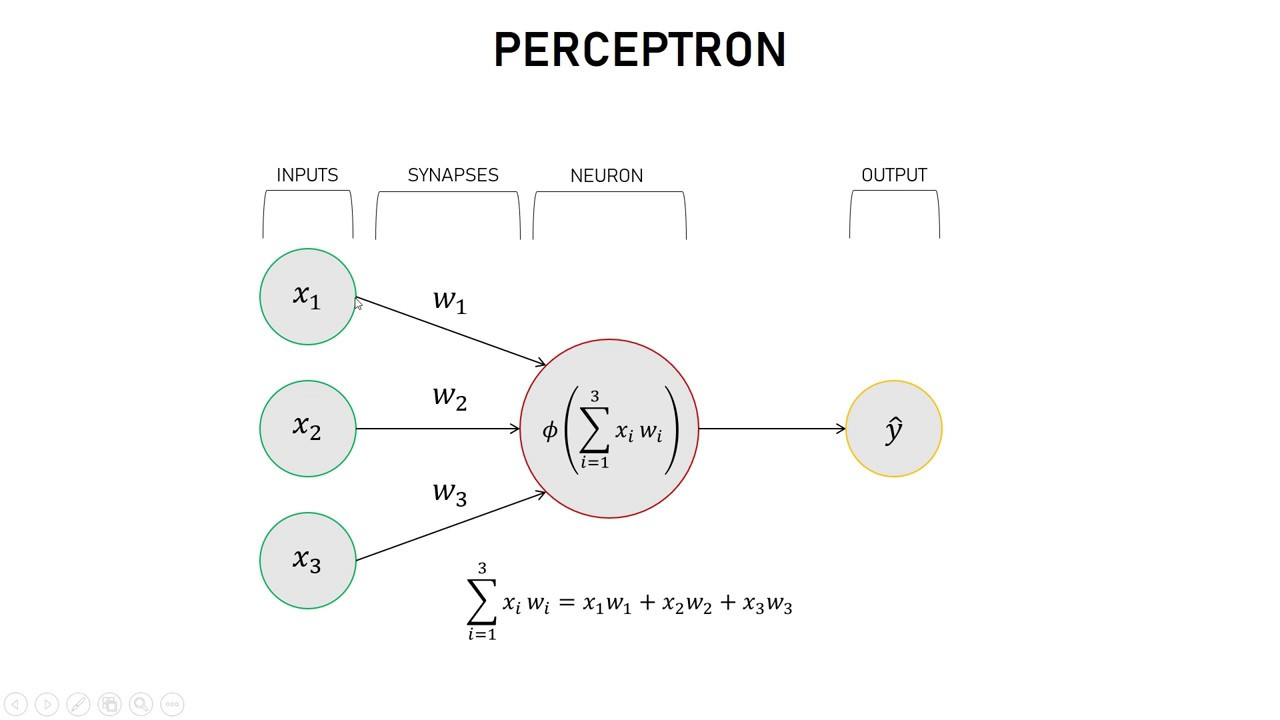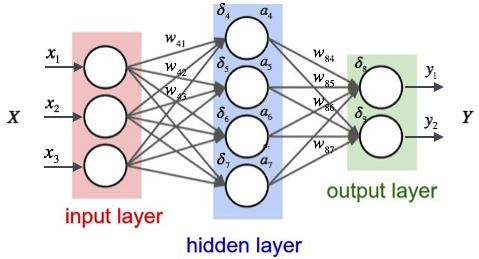

Importing

In [ ]:
import random as rd
from sklearn import preprocessing
from sklearn.datasets import load_iris

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from keras.datasets import mnist

In [ ]:
import pandas as pd

import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

IRIS data reeading and pre-processing

In [ ]:
#load the iris dataset
iris = load_iris()
#separate the data from the target attributes
X = iris.data
y = iris.target
#shuffling
x_shuffled, y_shuffled = shuffle_arrays_unison(arrays=[X, y], random_seed=42)
#normalize the data attributes
iris_input = preprocessing.normalize(x_shuffled).tolist() 
#Hot coding the output
iris_output = pd.get_dummies(y_shuffled.tolist()).to_numpy().tolist()
#train test splitting
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_input, iris_output, test_size=0.2, random_state=42)

Neural network with one layer

In [ ]:
#Creating random Ws
def random_w(rows, columns, seed):
  rd.seed(seed)
  return [[rd.random() for i in range(columns)] for j in range(rows)]

In [ ]:
class NN:
  def __init__(self, iterations,learning_rate,layer_length):
    self.accuracy = 0
    self.iterations = iterations
    self.learning_rate = learning_rate
    self.input_length = 0
    self.output_length = 0
    self.layer_length = layer_length
    self.w_1 = []
    self.w_o = []

  #Training
  def fit(self, x_train, y_train):
    self.input_length = len(x_train[0])
    self.output_length = len(y_train[0])
    self.w_1 = random_w(self.layer_length,self.input_length,42)
    self.w_o = random_w(self.output_length,self.layer_length,41)
    train_samples_number = len(x_train)
    final = []
    for o in range(self.iterations):
      output_final_prediction = [None for _ in range(self.output_length)]
      for b in range(train_samples_number):
        input = x_train[b]
        target = y_train[b]
        #forward
        #layer
        net_1 = []
        output_1 = []
        for i in range(self.layer_length):
          net_1_temp = np.dot(input,self.w_1[i])
          net_1.append(net_1_temp)
          output_1_temp = 1/(1+np.exp(-net_1_temp))
          output_1.append(output_1_temp)
        #output
        net_final = []
        output_final = []
        for j in range(self.output_length):
          net_final_temp = np.dot(output_1,self.w_o[j])
          net_final.append(net_final_temp)
          output_final_temp = 1/(1+np.exp(-net_final_temp)) 
          output_final.append(output_final_temp)
        #Backward
        #output
        delta_final = []
        delta_W_o = []
        for k in range(self.output_length):
          delta_final_temp = (target[k] - output_final[k]) * output_final[k] * (1 - output_final[k])
          delta_final.append(delta_final_temp)
          delta_W_o_temp = []
          for m in range(self.layer_length):
            delta_W_o_temp_temp = self.learning_rate * delta_final_temp * output_1[m]
            delta_W_o_temp.append(delta_W_o_temp_temp)
            self.w_o[k][m] = self.w_o[k][m] + delta_W_o_temp_temp
          delta_W_o.append(delta_W_o_temp)
        #layer
        delta_1 = []
        delta_w_1 = []
        for l in range(self.layer_length):
          w_o_prepare = []
          for n in range(self.output_length):
            w_o_prepare.append(self.w_o[n][l])
          delta_1_temp = np.dot(delta_final,w_o_prepare)*output_1[l]*(1-output_1[l])
          delta_1.append(delta_1_temp)
          delta_w_1_temp = []
          for f in range(self.input_length):
            delta_w_1_temp_temp = delta_1_temp * input[f] * self.learning_rate
            delta_w_1_temp.append(delta_w_1_temp_temp)
            self.w_1[l][f] = self.w_1[l][f] + delta_w_1_temp_temp
          delta_w_1.append(delta_w_1_temp)
      for u in range(self.output_length):
        output_final_prediction[u] = round(output_final[u])
      final.append(output_final_prediction)
 #Testing
  def predict(self,x_test, y_test):
    test_samples_number = len(x_test)
    self.output_length = len(y_test[0])
    final_test = []
    error = 0
    for b in range(test_samples_number):
      input = x_test[b]
      target = y_test[b]
      output_final_prediction = [None for _ in range(self.output_length)]
      for o in range(1):
        #forward
        #layer
        net_1 = []
        output_1 = []
        for i in range(self.layer_length):
          net_1_temp = np.dot(input,self.w_1[i])
          net_1.append(net_1_temp)
          output_1_temp = 1/(1+np.exp(-net_1_temp))
          output_1.append(output_1_temp)
        #output
        net_final = []
        output_final = []
        for j in range(self.output_length):
          net_final_temp = np.dot(output_1,self.w_o[j])
          net_final.append(net_final_temp)
          output_final_temp = 1/(1+np.exp(-net_final_temp)) 
          output_final.append(round(output_final_temp))
        if (output_final != target):
          error+= 1  
        final_test.append(output_final)
    #getting accuracy
    accuracy = (test_samples_number - error)/test_samples_number
    self.accuracy = accuracy

Neural network with one layer on IRIS data

In [ ]:
nn = NN(500,1,8)
nn.fit(iris_x_train, iris_y_train)
nn.predict(iris_x_test, iris_y_test)
print("Accuracy:", str(nn.accuracy*100)+"%")

Accuracy: 100.0%


Reading and pre-processing mnist data

In [ ]:
#the dataset exists in many places; sklearn, keras, and online with different qualities,
#so make sure to check the size first
digits = datasets.load_digits()
#or uncomment the following to use keras data
#(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
#Getting data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#shuffling
X_train, y_train = shuffle_arrays_unison(arrays=[X_train, y_train], random_seed=42)
X_test, y_test = shuffle_arrays_unison(arrays=[X_test, y_test], random_seed=42)
#normalize the data attributes
#getting some information about data
print("x train:", X_train.shape)
print("y train:", y_train.shape)
print("x test:", X_test.shape)
print("x test:", y_test.shape)
print("x train max",X_train.max())
print("x train min",X_train.min())
print("y train max",y_train.max())
print("y train min",y_train.min())
#make each image in a row
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
#scaling to have range of [0:1]
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0
#getting less data for time
X_train_less = X_train_scaled[0:1000,:]
X_test_less = X_test_scaled[0:200,:]
y_train_less = y_train[0:1000]
y_test_less = y_test[0:200]
#normalization
X_train_less = preprocessing.normalize(X_train_less).tolist()
X_test_less = preprocessing.normalize(X_test_less).tolist()
y_train_less = y_train[0:1000].tolist()
y_test_less = y_test[0:200].tolist()
#Hot coding the output
y_train_less = pd.get_dummies(y_train_less).to_numpy().tolist()
y_test_less = pd.get_dummies(y_test_less).to_numpy().tolist()

x train: (60000, 28, 28)
y train: (60000,)
x test: (10000, 28, 28)
x test: (10000,)
x train max 255
x train min 0
y train max 9
y train min 0


Visualisation

In [ ]:
digits = datasets.load_digits()

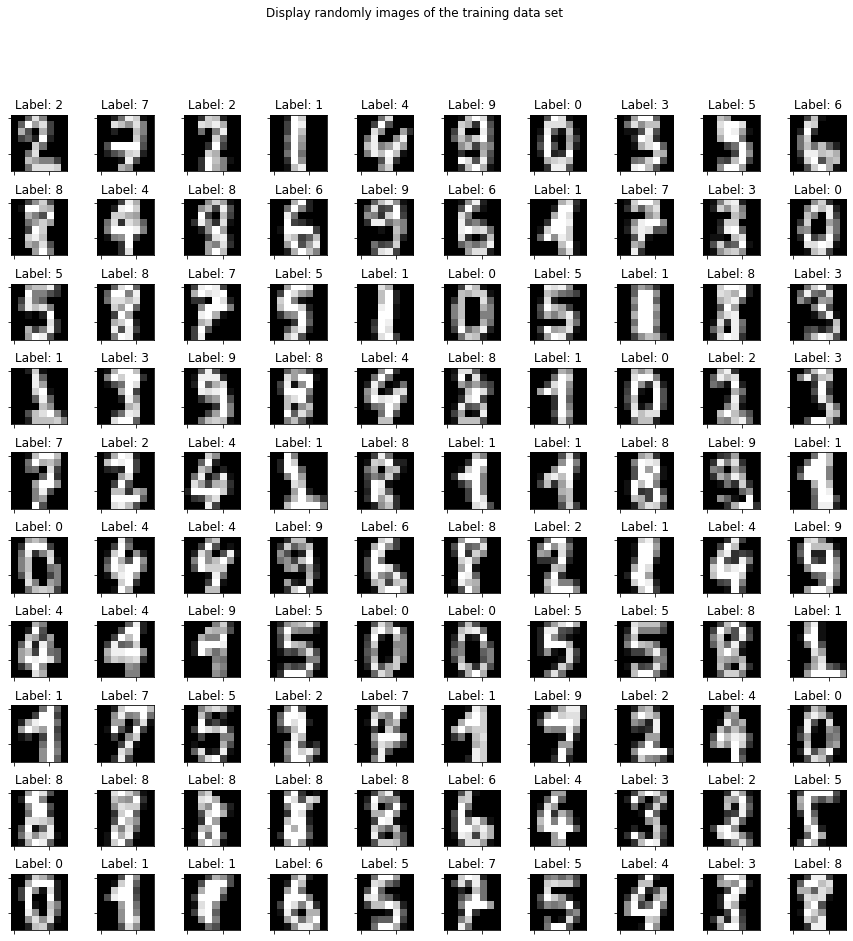

In [ ]:
# A helper display function

# check the reshape line, adjust it if needed for your image size
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(8,8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    return tmp
data = displayData(digits.images,digits.target) 

Neural network with one layer on mnist data

In [ ]:
nn = NN(100,0.2,10)
nn.fit(X_train_less, y_train_less)
nn.predict(X_test_less, y_test_less)
print("Accuracy:", str(nn.accuracy*100)+"%")

Accuracy: 20.0%


Accuracy is bad, so let's try to use 2 layers

Neural network with two layers

In [ ]:
class NN:
  def __init__(self, iterations,learning_rate,layer_length):
    self.accuracy = 0
    self.iterations = iterations
    self.learning_rate = learning_rate
    self.input_length = 0
    self.output_length = 0
    self.layer_length = layer_length
    self.w_1 = []
    self.w_o = []

  #Training
  def fit(self, x_train, y_train):
    self.input_length = len(x_train[0])
    self.output_length = len(y_train[0])
    self.w_1 = random_w(self.layer_length,self.input_length,42)
    self.w_2 = random_w(self.layer_length,self.layer_length,42)
    self.w_o = random_w(self.output_length,self.layer_length,41)
    train_samples_number = len(x_train)
    final = []
    for o in range(self.iterations):
      output_final_prediction = [None for _ in range(self.output_length)]
      for b in range(train_samples_number):
        input = x_train[b]
        target = y_train[b]
        #forward
        #layer 1
        net_1 = []
        output_1 = []
        for i in range(self.layer_length):
          net_1_temp = np.dot(input,self.w_1[i])
          net_1.append(net_1_temp)
          output_1_temp = 1/(1+np.exp(-net_1_temp))
          output_1.append(output_1_temp)

        #layer 2
        net_2 = []
        output_2 = []
        for p in range(self.layer_length):
          net_2_temp = np.dot(output_1,self.w_2[i])
          net_2.append(net_2_temp)
          output_2_temp = 1/(1+np.exp(-net_2_temp))
          output_2.append(output_2_temp)

        #output
        net_final = []
        output_final = []
        for j in range(self.output_length):
          net_final_temp = np.dot(output_2,self.w_o[j])
          net_final.append(net_final_temp)
          output_final_temp = 1/(1+np.exp(-net_final_temp)) 
          output_final.append(output_final_temp)
        #Backward
        #output
        delta_final = []
        delta_W_o = []
        for k in range(self.output_length):
          delta_final_temp = (target[k] - output_final[k]) * output_final[k] * (1 - output_final[k])
          delta_final.append(delta_final_temp)
          delta_W_o_temp = []
          for m in range(self.layer_length):
            delta_W_o_temp_temp = self.learning_rate * delta_final_temp * output_2[m]
            delta_W_o_temp.append(delta_W_o_temp_temp)
            self.w_o[k][m] = self.w_o[k][m] + delta_W_o_temp_temp
          delta_W_o.append(delta_W_o_temp)

        #layer 2
        delta_2 = []
        delta_w_2 = []
        for l in range(self.layer_length):
          w_o_prepare = []
          for n in range(self.output_length):
            w_o_prepare.append(self.w_o[n][l])
          delta_2_temp = np.dot(delta_final,w_o_prepare)*output_2[l]*(1-output_2[l])
          delta_2.append(delta_2_temp)
          delta_w_2_temp = []
          for f in range(self.layer_length):
            delta_w_2_temp_temp = delta_2_temp * output_2[f] * self.learning_rate
            delta_w_2_temp.append(delta_w_2_temp_temp)
            self.w_2[l][f] = self.w_2[l][f] + delta_w_2_temp_temp
          delta_w_2.append(delta_w_2_temp)

        #layer 1
        delta_1 = []
        delta_w_1 = []
        for l in range(self.layer_length):
          w_o_prepare = []
          for n in range(self.output_length):
            w_o_prepare.append(self.w_o[n][l])
          delta_1_temp = np.dot(delta_final,w_o_prepare)*output_1[l]*(1-output_1[l])
          delta_1.append(delta_1_temp)
          delta_w_1_temp = []
          for f in range(self.input_length):
            delta_w_1_temp_temp = delta_1_temp * input[f] * self.learning_rate
            delta_w_1_temp.append(delta_w_1_temp_temp)
            self.w_1[l][f] = self.w_1[l][f] + delta_w_1_temp_temp
          delta_w_1.append(delta_w_1_temp)

      for u in range(self.output_length):
        output_final_prediction[u] = round(output_final[u])
      final.append(output_final_prediction)
 #Testing
  def predict(self,x_test, y_test):
    test_samples_number = len(x_test)
    self.output_length = len(y_test[0])
    final_test = []
    error = 0
    for b in range(test_samples_number):
        input = x_test[b]
        target = y_test[b]
        #forward
        #layer 1
        net_1 = []
        output_1 = []
        for i in range(self.layer_length):
          net_1_temp = np.dot(input,self.w_1[i])
          net_1.append(net_1_temp)
          output_1_temp = 1/(1+np.exp(-net_1_temp))
          output_1.append(output_1_temp)

        #layer 2
        net_2 = []
        output_2 = []
        for p in range(self.layer_length):
          net_2_temp = np.dot(output_1,self.w_2[i])
          net_2.append(net_2_temp)
          output_2_temp = 1/(1+np.exp(-net_2_temp))
          output_2.append(output_2_temp)

        #output
        net_final = []
        output_final = []
        for j in range(self.output_length):
          net_final_temp = np.dot(output_2,self.w_o[j])
          net_final.append(net_final_temp)
          output_final_temp = 1/(1+np.exp(-net_final_temp)) 
          output_final.append(output_final_temp)
        if (output_final != target):
          error+= 1  
        final_test.append(output_final)
    #getting accuracy
    accuracy = (test_samples_number - error)/test_samples_number
    self.accuracy = accuracy

Neural network with two layers on mnist data

In [ ]:
nn = NN(100,0.2,10)
nn.fit(X_train_less, y_train_less)
nn.predict(X_test_less, y_test_less)
print("Accuracy:", str(nn.accuracy*100)+"%")



```
NN with 2 layer implementation has an issue needed to be revised again.
```



## References
https://becominghuman.ai/understanding-neural-networks-2-the-math-of-neural-networks-in-3-equations-6085fd3f09df
https://towardsdatascience.com/how-to-define-a-neural-network-as-a-mathematical-function-f7b820cde3f
